In [4]:
import tensorflow 
from tensorflow.keras.layers import MaxPooling2D,Conv2D,Dense,Dropout,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
import os

In [7]:
main_dir="/content/drive/MyDrive/Datasets/New Masks Dataset"
Test_dir=os.path.join(main_dir,'Test')
Train_dir=os.path.join(main_dir,'Train')
validation_dir=os.path.join(main_dir,'Validation')

Train_mask_dir=os.path.join(Train_dir,'Mask')
Train_nomask_dir=os.path.join(Train_dir,'Non Mask')


In [8]:
train_mask_names=os.listdir(Train_mask_dir)
print(train_mask_names[:10])
train_nomask_names=os.listdir(Train_nomask_dir)
print(train_nomask_names[:10])

['0003.jpg', '0934.png', '0583.jpg', '1195.jpg', '1214.jpg', '1394.jpg', '0112.png', '0113.jpg', '0110.jpg', '0066.jpg']
['120.jpg', '127.jpg', '125.jpg', '124.jpg', '122.jpg', '123.jpg', '12.jpg', '119.jpg', '118.jpg', '117.jpg']


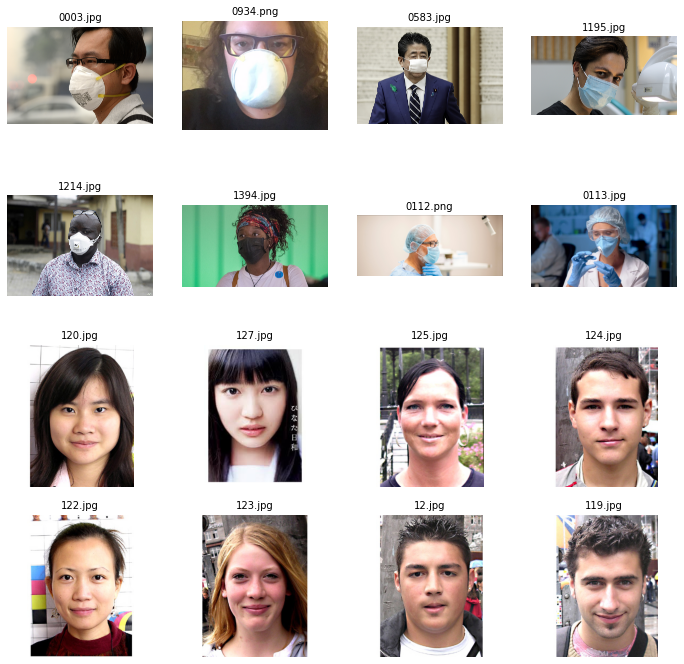

In [13]:
import matplotlib.image as mpimg
nrows=4
ncols=4
plt.figure(figsize=(12,12))
mask_pic=[]
for i in train_mask_names[:8]:
  mask_pic.append(os.path.join(Train_mask_dir,i))
nomask_pic=[]
for i in train_nomask_names[:8]:
  nomask_pic.append(os.path.join(Train_nomask_dir,i))
merged_pic=mask_pic+nomask_pic

for i in range(0,len(merged_pic)):
  #title fetch krte hai image ka
  title_data=merged_pic[i].split('/')[-1]
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  image=mpimg.imread(merged_pic[i])
  sp.set_title(title_data,fontsize=10)
  plt.imshow(image,cmap='gray')

In [15]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,rotation_range=40,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

In [16]:
train_generator=train_datagen.flow_from_directory(Train_dir,target_size=(150,150),batch_size=32,class_mode='binary')
test_generator=test_datagen.flow_from_directory(Test_dir,target_size=(150,150),batch_size=32,class_mode='binary')
Valid_generator=valid_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=32,class_mode='binary')

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [17]:
train_generator.class_indices  #ye apne labels hai

{'Mask': 0, 'Non Mask': 1}

In [18]:
train_generator.image_shape

(150, 150, 3)

In [29]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64,kernel_size=(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 87616)            

In [30]:
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [32]:
history=model.fit(train_generator,epochs=30,validation_data=Valid_generator)

Epoch 1/30
19/19 [==============================] - 13s 692ms/step - loss: 0.6279 - accuracy: 0.7033 - val_loss: 0.6386 - val_accuracy: 0.7908
Epoch 2/30
19/19 [==============================] - 13s 721ms/step - loss: 0.4663 - accuracy: 0.8100 - val_loss: 0.5939 - val_accuracy: 0.7908
Epoch 3/30
19/19 [==============================] - 13s 689ms/step - loss: 0.3952 - accuracy: 0.8400 - val_loss: 0.4744 - val_accuracy: 0.8464
Epoch 4/30
19/19 [==============================] - 13s 708ms/step - loss: 0.3299 - accuracy: 0.8717 - val_loss: 0.4085 - val_accuracy: 0.8954
Epoch 5/30
19/19 [==============================] - 13s 698ms/step - loss: 0.3086 - accuracy: 0.8833 - val_loss: 0.3662 - val_accuracy: 0.8954
Epoch 6/30
19/19 [==============================] - 13s 690ms/step - loss: 0.2558 - accuracy: 0.9117 - val_loss: 0.3379 - val_accuracy: 0.8824
Epoch 7/30
19/19 [==============================] - 13s 688ms/step - loss: 0.2354 - accuracy: 0.9167 - val_loss: 0.2876 - val_accuracy: 0.9150

In [33]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

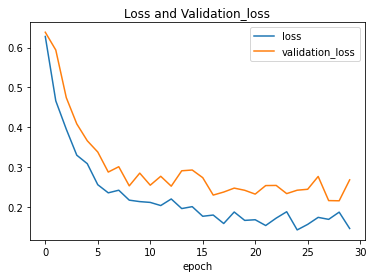

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','validation_loss'])
plt.title('Loss and Validation_loss')
plt.xlabel('epoch')
plt.show()

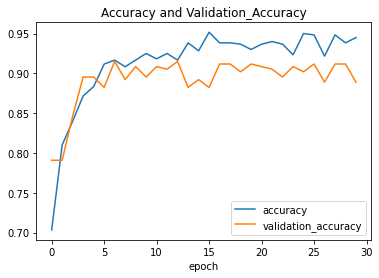

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','validation_accuracy'])
plt.title('Accuracy and Validation_Accuracy')
plt.xlabel('epoch')
plt.show()

In [36]:
test_loss,test_accuracy=model.evaluate(test_generator)
print('test_loss{},test_accuracy{}'.format(test_loss,test_accuracy))

4/4 [==============================] - 26s 9s/step - loss: 0.2093 - accuracy: 0.9400
test_loss0.20929662883281708,test_accuracy0.9399999976158142


In [38]:
from google.colab import files
from tensorflow.keras.preprocessing import image
uploaded=files.upload()
for fname in uploaded.keys():
  Img_path='/content/'+fname
  img=image.load_img(Img_path,target_size=(150,150))
  images=image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction=model.predict(images)
  print(fname)
  if(prediction==0):
    print('Mask')
  else:
    print('No Mask')


Saving no mask.jpg to no mask (1).jpg
Saving maskimage.jpg to maskimage (1).jpg
no mask.jpg
No Mask
maskimage.jpg
Mask


In [39]:
model.save('Covid19_face_mask_detection_model.h5')